## 1. Import the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# loading dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/A&O Sci C111/Project/diabetes_data.csv'

# using pandas library to load .csv file as a dataframe object
data = pd.read_csv(filepath)
pd.set_option('display.max_columns', None)
data.head()

Mounted at /content/drive


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## 2a. Exploratory Data Analysis (EDA)


<ipython-input-2-9b3ecc4f13d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="class", palette= sns.color_palette())
<ipython-input-2-9b3ecc4f13d5>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x="class", palette= sns.color_palette())


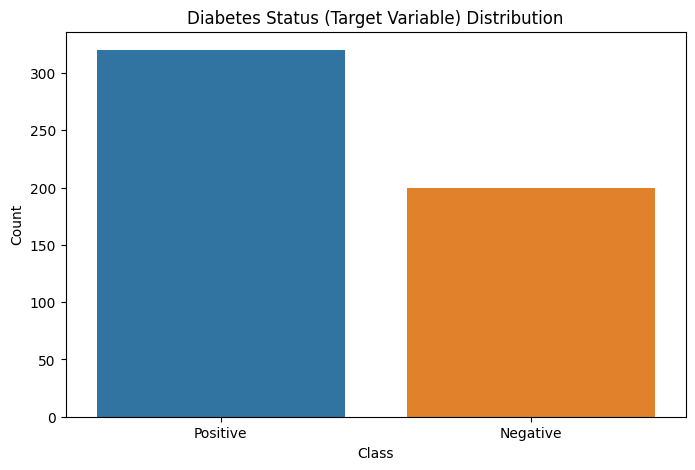

,count
class,
Positive,320
Negative,200


In [ ]:
# Diabetes Status (Target Variable) Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data, x="class", palette= sns.color_palette())
plt.title("Diabetes Status (Target Variable) Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
print()
data['class'].value_counts()

The dataset is slightly skewed/imbalanced, with 320 positive instances and 200 negative instances.

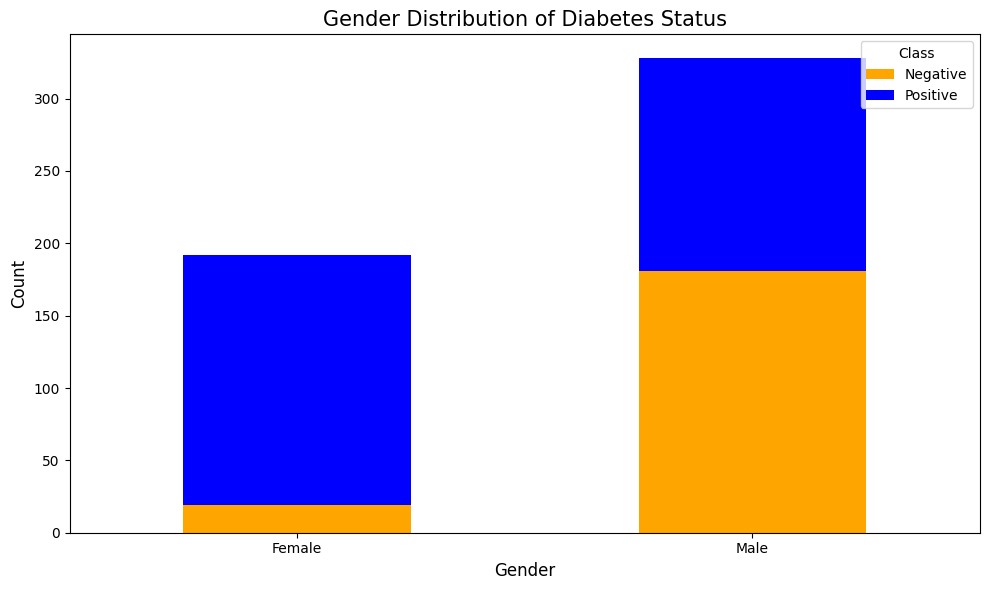

Male:
 class
Negative    181
Positive    147
Name: count, dtype: int64

Female:
 class
Positive    173
Negative     19
Name: count, dtype: int64


In [ ]:
# Gender Stacked Bar Chart of Diabetes Status

# group data by Gender and Class and count occurrences
grouped_data = data.groupby(['Gender', 'class']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])
plt.title('Gender Distribution of Diabetes Status', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Male:\n", data[(data['Gender'] == "Male")]['class'].value_counts())
print("\nFemale:\n", data[(data['Gender'] == "Female")]['class'].value_counts())

There are much more data observations for males (328) compared to females (192). In addition, the female subset has a strong class imbalance that presents bias toward the majority class, which is positive. This may lead to skewed evaluation metrics during modeling, especially high accuracy. We will take these into consideration in our analysis.

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


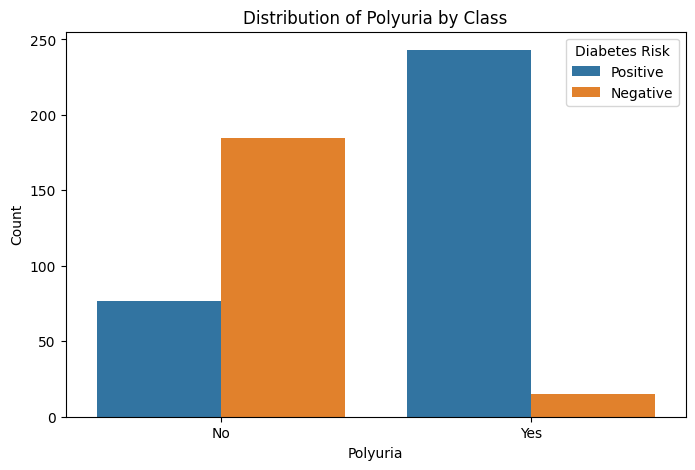

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


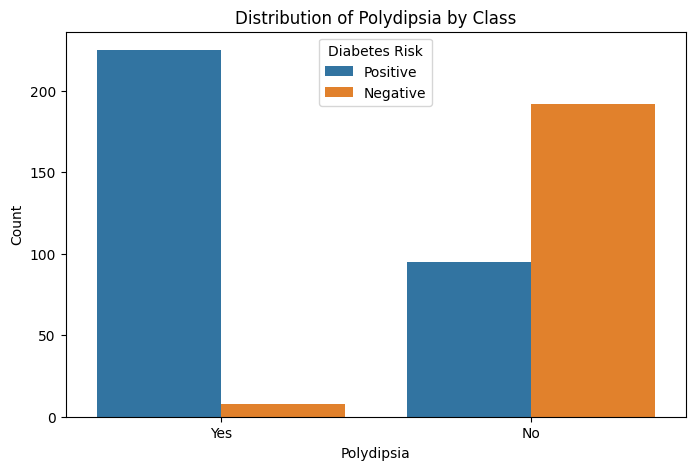

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


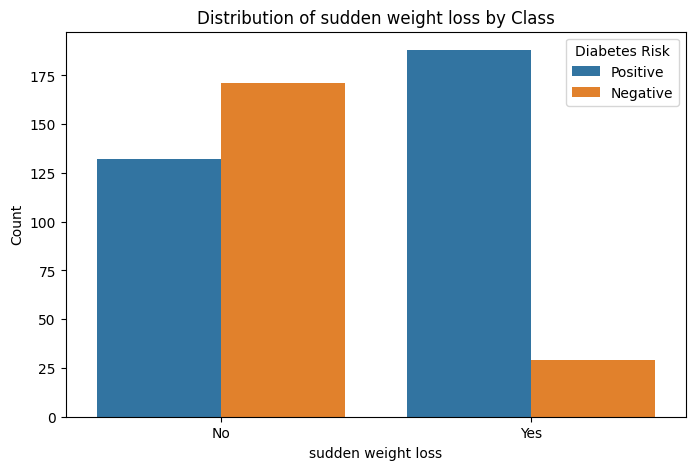

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


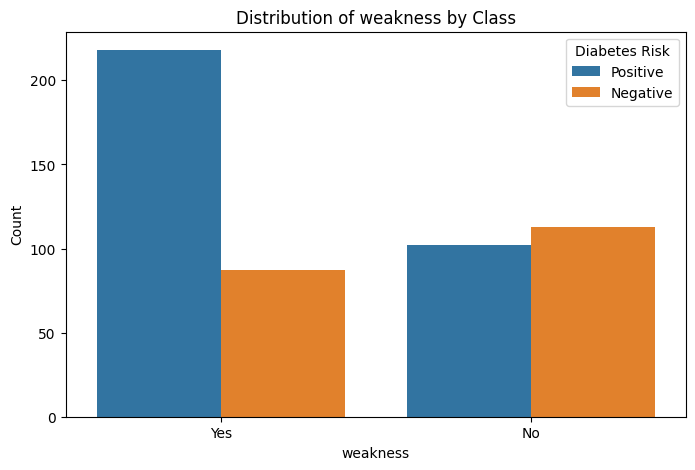

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


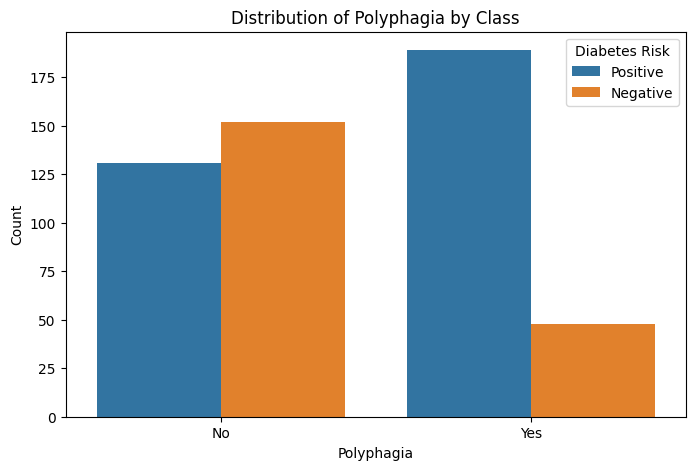

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


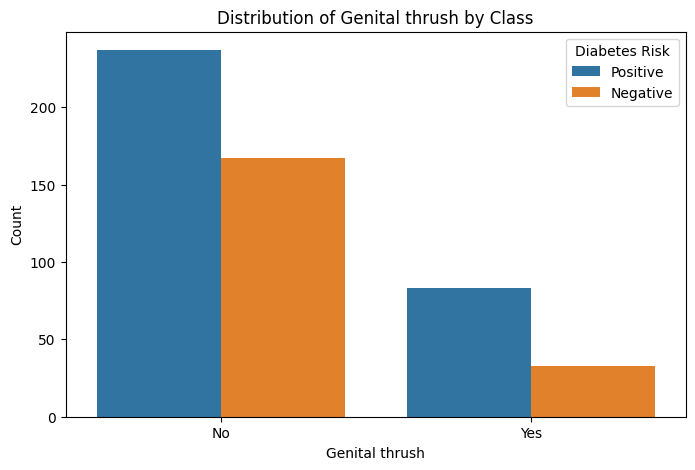

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


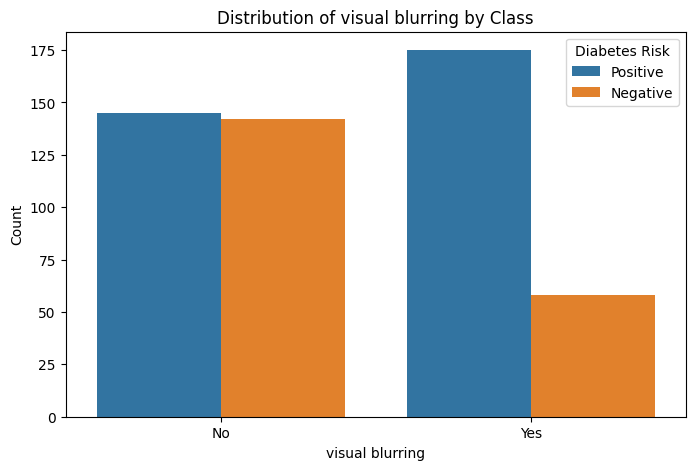

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


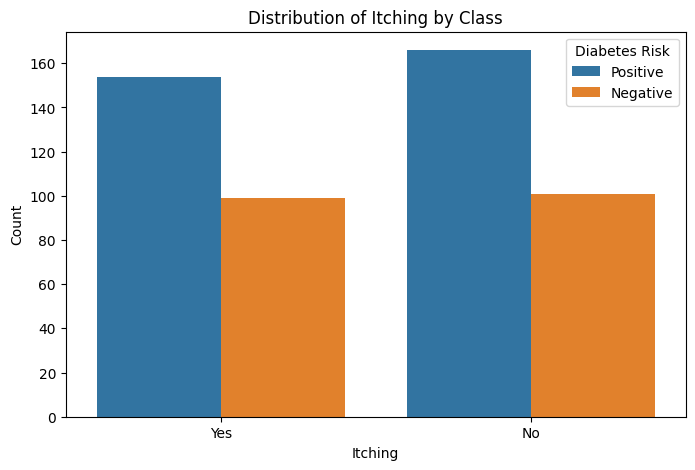

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


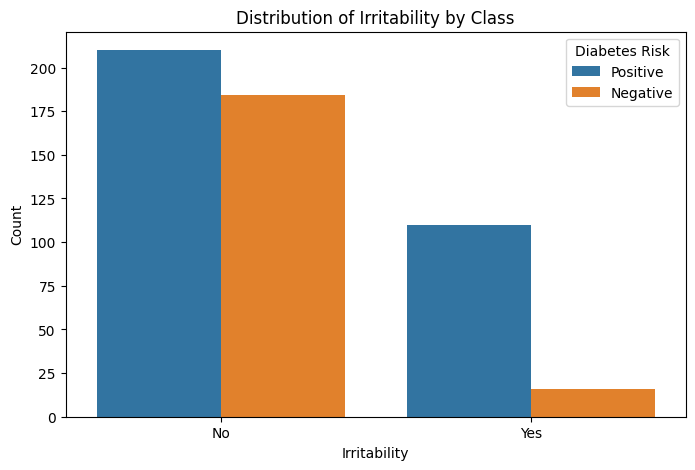

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


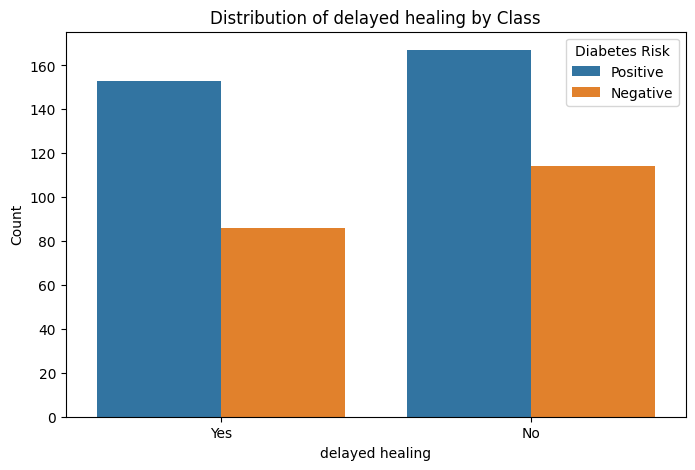

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


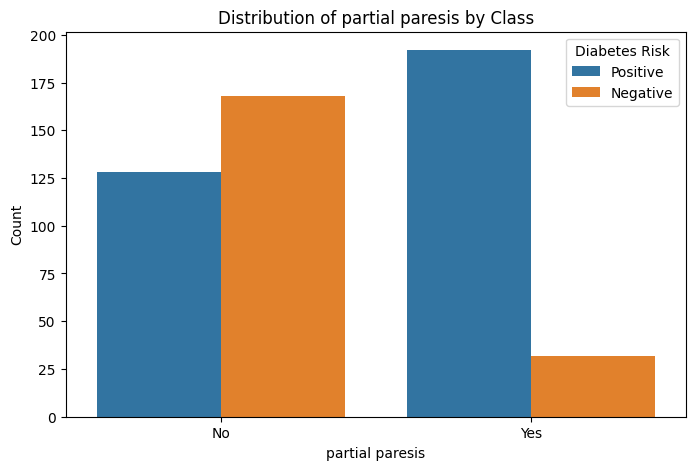

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


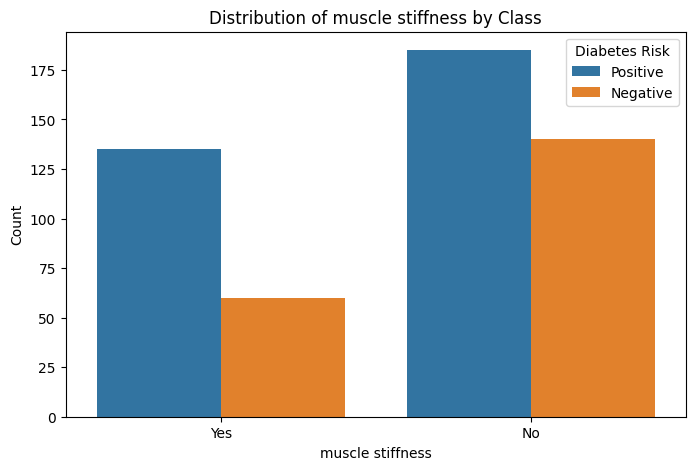

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


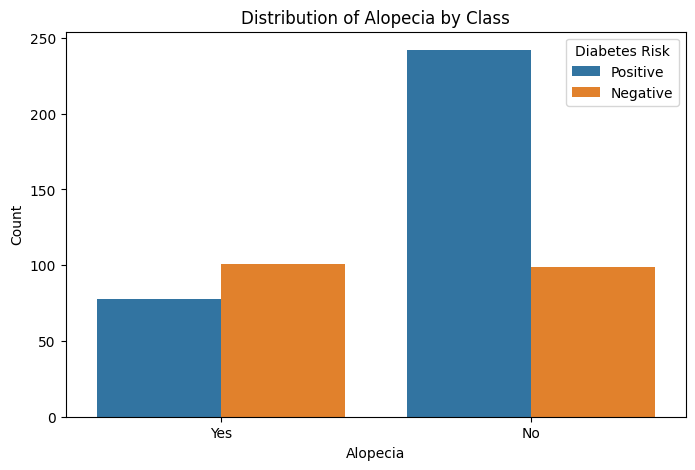

<ipython-input-4-853877251934>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())


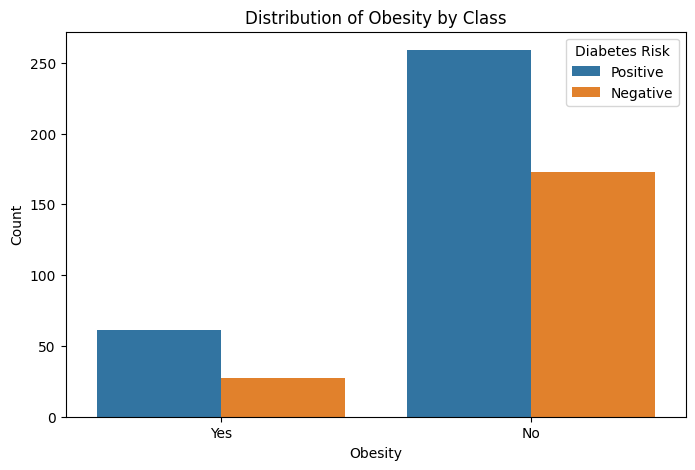

In [ ]:
# Non-Demographic/Patient Symptom Categorical Features (14) Bar Charts
categorical_features = data.columns.drop(['Age', 'Gender', 'class']).to_list()
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data, x=feature, hue="class", palette=sns.color_palette())
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Diabetes Risk")
    plt.show()


In [ ]:
# detailed overview of each column excluding Age
for column in data.columns.drop('Age'):
    print(f"Column: {column}")
    print(data[column].unique())

Column: Gender
['Male' 'Female']
Column: Polyuria
['No' 'Yes']
Column: Polydipsia
['Yes' 'No']
Column: sudden weight loss
['No' 'Yes']
Column: weakness
['Yes' 'No']
Column: Polyphagia
['No' 'Yes']
Column: Genital thrush
['No' 'Yes']
Column: visual blurring
['No' 'Yes']
Column: Itching
['Yes' 'No']
Column: Irritability
['No' 'Yes']
Column: delayed healing
['Yes' 'No']
Column: partial paresis
['No' 'Yes']
Column: muscle stiffness
['Yes' 'No']
Column: Alopecia
['Yes' 'No']
Column: Obesity
['Yes' 'No']
Column: class
['Positive' 'Negative']


In [ ]:
# detailed overview of Age column (only numeric data)
print(np.array(sorted(data['Age'].unique())))
print()
print(data['Age'].describe())

[16 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 79 85 90]

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64


Now knowing the summary statistics of the age variable, I first tried to bin the data into 5 different age groups with an interval of 15 (1. 15-30, 2. 31-45, 3. 46-60, 4. 61-75, 5. 76-90). This value was chosen because it is close to the calculated standard deviation of 12. The purpose of this action was to turn age into a categorical feature and explore how the diabetes diagnosis depends on age.

<ipython-input-7-e3273d1db838>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class = data.groupby([pd.cut(data['Age'], bins=bins), 'class']).size().unstack()


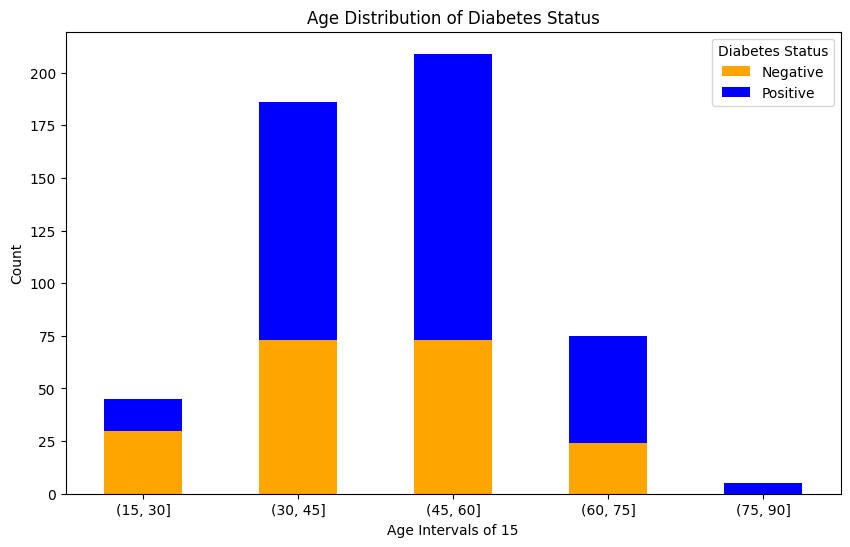

Ages 15-30:
 class
Negative    30
Positive    15
Name: count, dtype: int64

Ages 31-45:
 class
Positive    113
Negative     73
Name: count, dtype: int64

Ages 46-60:
 class
Positive    136
Negative     73
Name: count, dtype: int64

Ages 61-75:
 class
Positive    51
Negative    24
Name: count, dtype: int64

Ages 76-90:
 class
Positive    5
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create age intervals of 15 years
bins = range(15, int(data['Age'].max()) + 15, 15)
age_class = data.groupby([pd.cut(data['Age'], bins=bins), 'class']).size().unstack()
age_class.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])

plt.title('Age Distribution of Diabetes Status')
plt.xlabel('Age Intervals of 15')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.xticks(rotation=0)
plt.show()

print("Ages 15-30:\n", data[(data['Age'] > 15) & (data['Age'] <= 30)]['class'].value_counts())
print("\nAges 31-45:\n", data[(data['Age'] > 30) & (data['Age'] <= 45)]['class'].value_counts())
print("\nAges 46-60:\n", data[(data['Age'] > 45) & (data['Age'] <= 60)]['class'].value_counts())
print("\nAges 61-75:\n", data[(data['Age'] > 60) & (data['Age'] <= 75)]['class'].value_counts())
print("\nAges 76-90:\n", data[(data['Age'] > 75) & (data['Age'] <= 90)]['class'].value_counts())

From our EDA, we observe that not all age groups have sufficient data, especially ages 15-30 and 76-90. Specifically, the oldest age group has no instances of the negative class at all, which is not useful for our binary classification purposes. The lack of balanced representation would cause overfitting to the positive class as the model has no basis to learn the distinction between the two classes. Thus I decided to instead split the age group in half according to the median age, separated as the young (15 - 47 years) and old (48 - 90 years) group. We can now work with age as an effective categorical feature.

<ipython-input-8-b0e13047be80>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class = data.groupby([pd.cut(data['Age'], bins=[15, 47, 90]), 'class']).size().unstack()


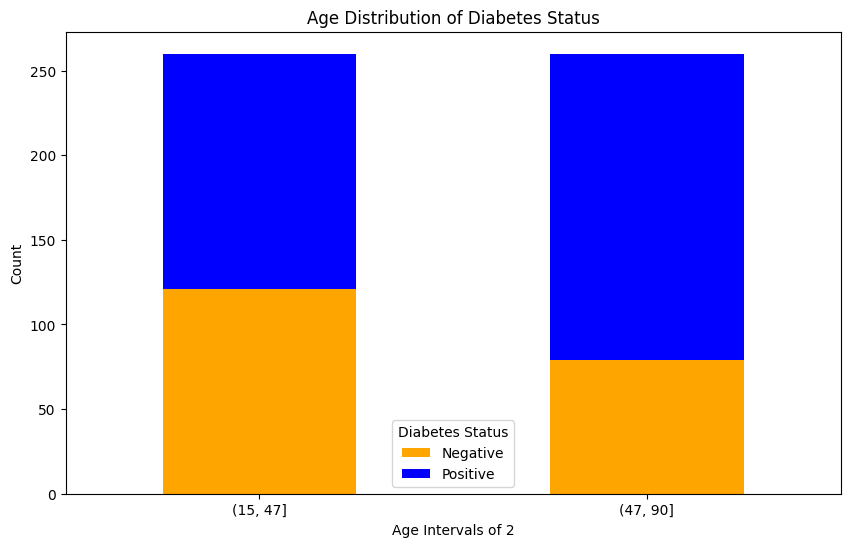

Ages 15-47:
 class
Positive    139
Negative    121
Name: count, dtype: int64

Ages 48-90:
 class
Positive    181
Negative     79
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create 2 age intervals
age_class = data.groupby([pd.cut(data['Age'], bins=[15, 47, 90]), 'class']).size().unstack()
age_class.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])

plt.title('Age Distribution of Diabetes Status')
plt.xlabel('Age Intervals of 2')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.xticks(rotation=0)
plt.show()

print("Ages 15-47:\n", data[(data['Age'] > 15) & (data['Age'] <= 47)]['class'].value_counts())
print("\nAges 48-90:\n", data[(data['Age'] > 47) & (data['Age'] <= 90)]['class'].value_counts())

## 2b. Clean and preprocess the data
- Check if there are any missing values; if present, go through the imputation/removal process
- Convert yes/no values to binary for logistic regression
- Encode the targat variable ("class") as binary (1 for "Positive" and 0 for "Negative")
- From our EDA, it was noted that the diagnosis could depend on the demographic variables (age and gender). Thus we split the dataset by gender and age group.

In [ ]:
# check if there are any missing values
# if present, go through the imputation/removal process
print(data.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


There are no missing values; therefore we do not have to go through the removal/imputation process.

In [ ]:
# convert yes/no values to binary for logistic regression
data.iloc[:, 2:16] = data.iloc[:, 2:16].replace({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# encode target variable ("class") as binary
# 1 for "Positive" and 0 for "Negative"
data['class'] = data['class'].replace({'Positive': 1, 'Negative': 0})
data.head()

<ipython-input-10-d9e4c4c6768e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 2:16] = data.iloc[:, 2:16].replace({'Yes': 1, 'No': 0})
<ipython-input-10-d9e4c4c6768e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-10-d9e4c4c6768e>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# separate data by gender
male_data = data[data['Gender'] == 1].drop(columns = ['Gender'], axis = 1)
female_data = data[data['Gender'] == 0].drop(columns = ['Gender'], axis = 1)

# separate data by age
young_data = data[data['Age'] < np.median(data['Age'])]
old_data = data[data['Age'] >= np.median(data['Age'])]

print("Male Data Shape:", male_data.shape)
print("Female Data Shape:", female_data.shape)

print("Young Age Data (15 - 47 years):", young_data.shape)
print("Old Age Data (48 - 90 years):", old_data.shape)

Male Data Shape: (328, 16)
Female Data Shape: (192, 16)
Young Age Data (15 - 47 years): (260, 17)
Old Age Data (48 - 90 years): (260, 17)


## 3. Modeling and Evaluating the Data (All Features)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into input (X) and output (y) variables
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Shape of X_Train:', X_train.shape, "", 'Shape of y_train:', y_train.shape)
print('Shape of X_Test:', X_test.shape, "", 'Shape of y_test:', y_test.shape)

Shape of X_Train: (416, 16)  Shape of y_train: (416,)
Shape of X_Test: (104, 16)  Shape of y_test: (104,)


### 3a. Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.9038461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104


Confusion Matrix:
 [[34  4]
 [ 6 60]]


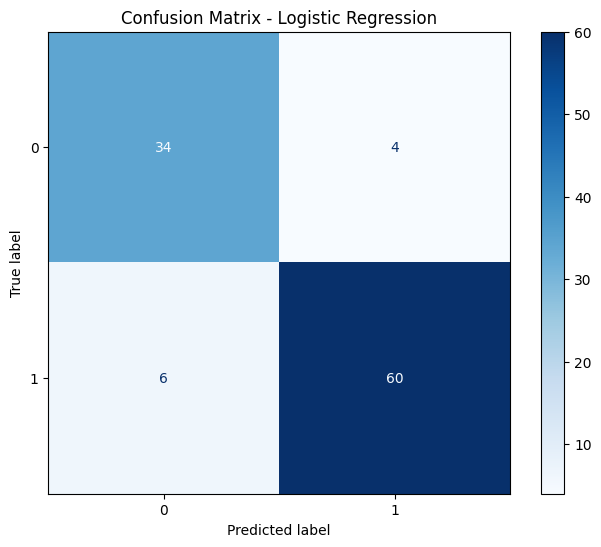

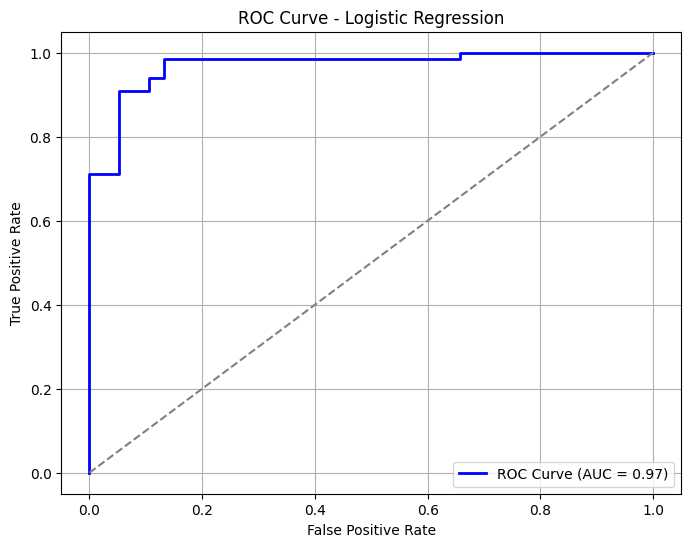

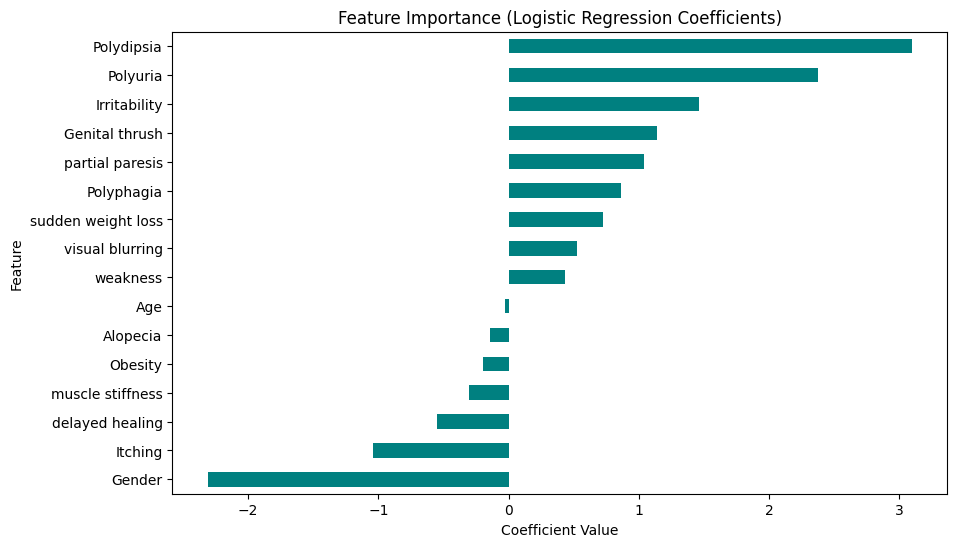

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model_logreg, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot ROC curve
y_prob = model_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature importance (coefficients)
coefficients = pd.Series(model_logreg.coef_[0], index=X_train.columns).sort_values()
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


### 3b. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9711538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.97      0.98      0.98        66

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104


Confusion Matrix:
 [[36  2]
 [ 1 65]]


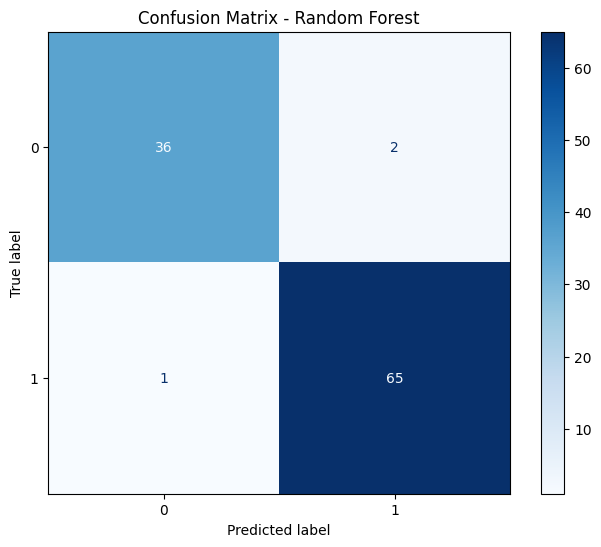

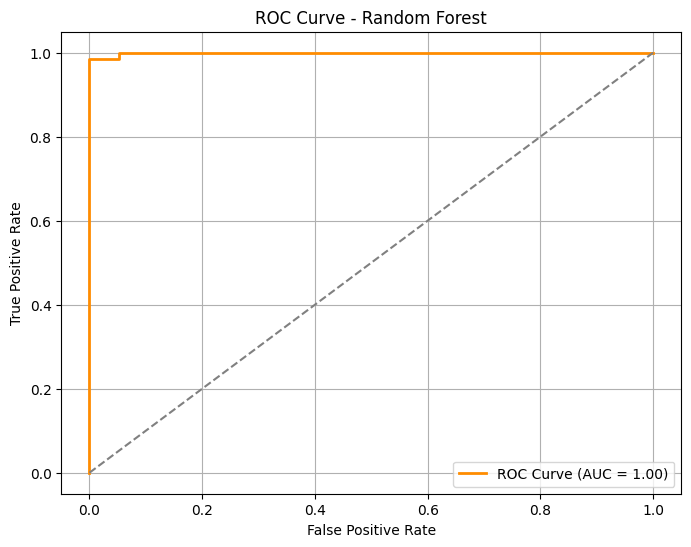

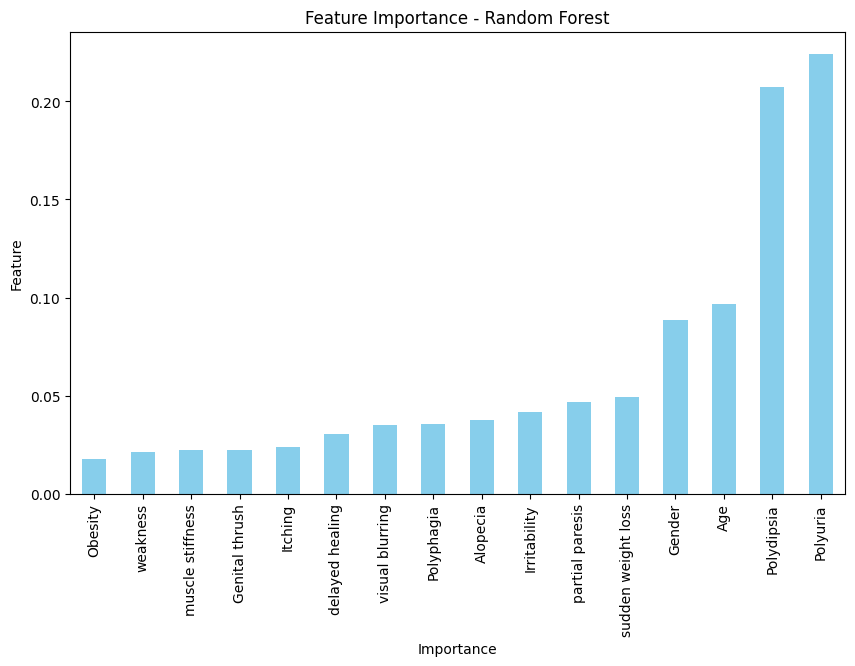

In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 3c. Suport Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Normalize/Standardize numeric feature (age)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

# Train an SVM model
svm_model = SVC(kernel="rbf", probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9423076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.95      0.95      0.95        66

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104


Confusion Matrix:
 [[35  3]
 [ 3 63]]


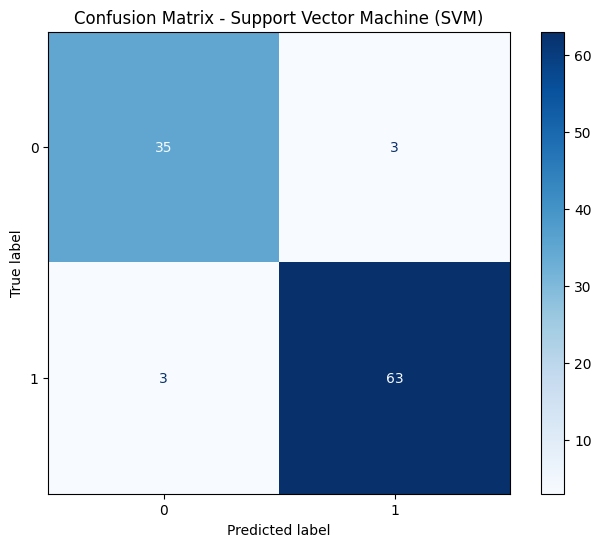

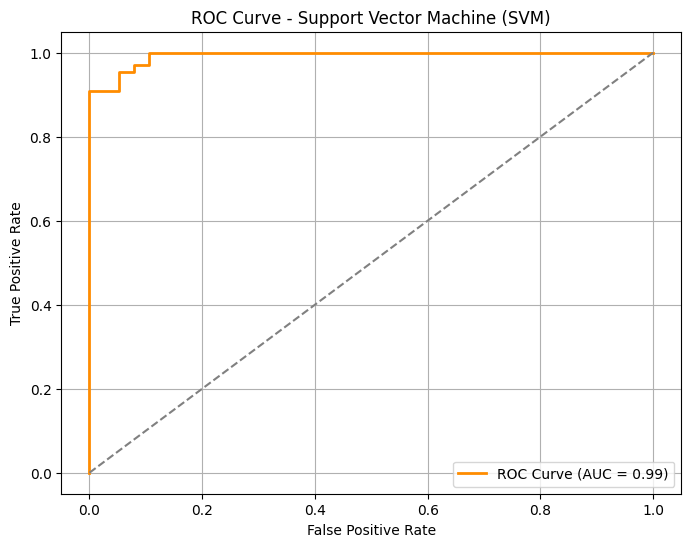

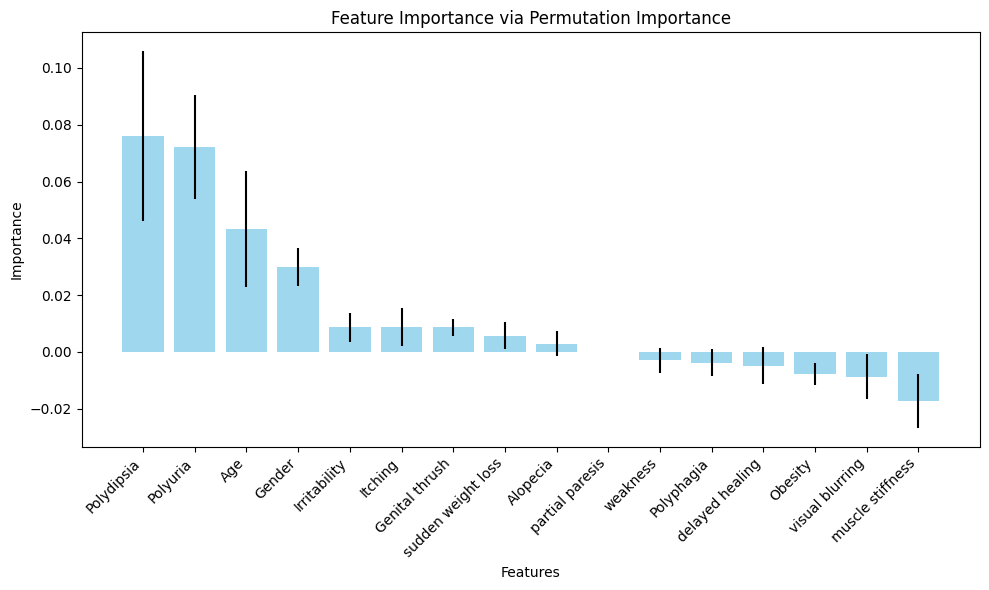

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.show()

# ROC curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Support Vector Machine (SVM)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculate permutation importance
result = permutation_importance(svm_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Get mean and standard deviation of the importances
importance_means = result.importances_mean
importance_stds = result.importances_std
feature_names = data.drop(columns=["class"]).columns

# Plot feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(importance_means)[::-1]  # Sort features by importance
plt.bar(range(X.shape[1]), importance_means[indices], yerr=importance_stds[indices], align="center", color='skyblue', alpha=0.8)
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.title("Feature Importance via Permutation Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### All ROC Curves on one plot

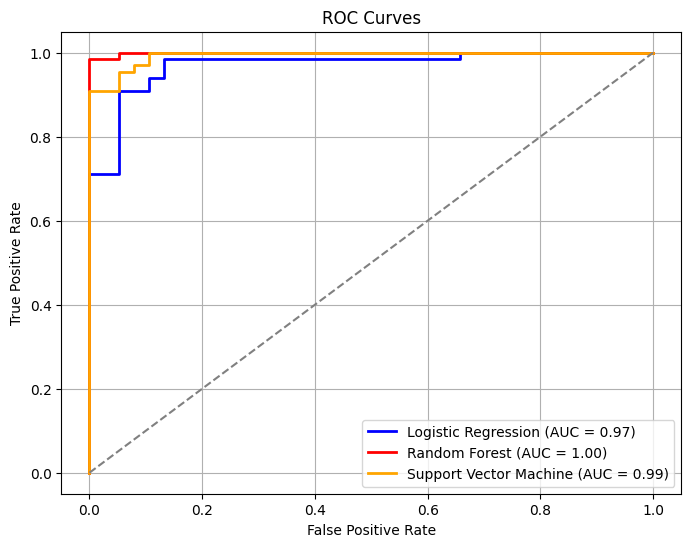

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 4. Modeling and Evaluating the Data (Demographic Subsets)


### 4a. Logistic Regression & Random Forest by Gender

#### i) Male Subset - Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into input (X) and output (y) variables
X = male_data.drop('class', axis=1)
y = male_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Shape of X_Train:', X_train.shape, "", 'Shape of y_train:', y_train.shape)
print('Shape of X_Test:', X_test.shape, "", 'Shape of y_test:', y_test.shape)

Shape of X_Train: (262, 15)  Shape of y_train: (262,)
Shape of X_Test: (66, 15)  Shape of y_test: (66,)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.9393939393939394

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.89      0.96      0.93        26

    accuracy                           0.94        66
   macro avg       0.93      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66


Confusion Matrix:
 [[37  3]
 [ 1 25]]


#### ii) Male Subset - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        26

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


Confusion Matrix:
 [[40  0]
 [ 0 26]]


#### iii) Male Subset - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Normalize/Standardize numeric feature (age)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

# Train an SVM model
svm_model = SVC(kernel="rbf", probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        26

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


Confusion Matrix:
 [[40  0]
 [ 0 26]]


#### iv) Female Subset - Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into input (X) and output (y) variables
X = female_data.drop('class', axis=1)
y = female_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Shape of X_Train:', X_train.shape, "", 'Shape of y_train:', y_train.shape)
print('Shape of X_Test:', X_test.shape, "", 'Shape of y_test:', y_test.shape)

Shape of X_Train: (153, 15)  Shape of y_train: (153,)
Shape of X_Test: (39, 15)  Shape of y_test: (39,)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.9487179487179487

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.97      0.97      0.97        34

    accuracy                           0.95        39
   macro avg       0.89      0.89      0.89        39
weighted avg       0.95      0.95      0.95        39


Confusion Matrix:
 [[ 4  1]
 [ 1 33]]


#### v) Female Subset - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9743589743589743

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.97      0.99        34

    accuracy                           0.97        39
   macro avg       0.92      0.99      0.95        39
weighted avg       0.98      0.97      0.98        39


Confusion Matrix:
 [[ 5  0]
 [ 1 33]]


#### vi) Female Subset - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Normalize/Standardize numeric feature (age)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

# Train an SVM model
svm_model = SVC(kernel="rbf", probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9743589743589743

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.97      1.00      0.99        34

    accuracy                           0.97        39
   macro avg       0.99      0.90      0.94        39
weighted avg       0.98      0.97      0.97        39


Confusion Matrix:
 [[ 4  1]
 [ 0 34]]


### 4b. Logistic Regression & Random Forest by Age

#### i) Young Subset - Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into input (X) and output (y) variables
X = young_data.drop('class', axis=1)
y = young_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Shape of X_Train:', X_train.shape, "", 'Shape of y_train:', y_train.shape)
print('Shape of X_Test:', X_test.shape, "", 'Shape of y_test:', y_test.shape)

Shape of X_Train: (208, 16)  Shape of y_train: (208,)
Shape of X_Test: (52, 16)  Shape of y_test: (52,)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.84      0.84      0.84        25

    accuracy                           0.85        52
   macro avg       0.85      0.85      0.85        52
weighted avg       0.85      0.85      0.85        52


Confusion Matrix:
 [[23  4]
 [ 4 21]]


#### ii) Young Subset - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9807692307692307

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        25

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52


Confusion Matrix:
 [[26  1]
 [ 0 25]]


#### iii) Young Subset - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Normalize/Standardize numeric feature (age)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

# Train an SVM model
svm_model = SVC(kernel="rbf", probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9038461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.95      0.84      0.89        25

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52


Confusion Matrix:
 [[26  1]
 [ 4 21]]


#### iv) Old Subset - Logistic Regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# split into input (X) and output (y) variables
X = old_data.drop('class', axis=1)
y = old_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Shape of X_Train:', X_train.shape, "", 'Shape of y_train:', y_train.shape)
print('Shape of X_Test:', X_test.shape, "", 'Shape of y_test:', y_test.shape)

Shape of X_Train: (208, 16)  Shape of y_train: (208,)
Shape of X_Test: (52, 16)  Shape of y_test: (52,)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.9423076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.94      0.97      0.96        35

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.93        52
weighted avg       0.94      0.94      0.94        52


Confusion Matrix:
 [[15  2]
 [ 1 34]]


#### v) Old Subset - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        35

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52


Confusion Matrix:
 [[17  0]
 [ 0 35]]


#### vi) Old Subset - Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Normalize/Standardize numeric feature (age)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

# Train an SVM model
svm_model = SVC(kernel="rbf", probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9807692307692307

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.97      1.00      0.99        35

    accuracy                           0.98        52
   macro avg       0.99      0.97      0.98        52
weighted avg       0.98      0.98      0.98        52


Confusion Matrix:
 [[16  1]
 [ 0 35]]
